In [33]:
import numpy as np
import pandas as pd
import dabest
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.cm as cm
my_color_palette = {'BZD': '#8FB996', 'BL': '#594157'}

In [28]:
# Load exemple data
patient = 'EL014'
All_LFP_df = pd.read_pickle('Human_data/'+patient+'_LFP_df')
list_channel = np.load('Human_data/'+patient+'_list_channel.npy')
conditions = ['BL','BZD']

/var/folders/6r/0p67bvdn7t75cb5rwnqb9qdr0000gn/T/ipykernel_7772/3088485447.py:6: RuntimeWarning: Mean of empty slice
  Mean_corr_matrix_BL = np.nanmean(list_matrix_BL, axis=0)
/var/folders/6r/0p67bvdn7t75cb5rwnqb9qdr0000gn/T/ipykernel_7772/3088485447.py:10: RuntimeWarning: Mean of empty slice
  Mean_corr_matrix_BZD = np.nanmean(list_matrix_BZD, axis=0)
/var/folders/6r/0p67bvdn7t75cb5rwnqb9qdr0000gn/T/ipykernel_7772/3088485447.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorbar = colorbar.ColorbarBase(ax4, orientation='horizontal', cmap=cm.get_cmap('seismic'),norm=divnorm_diff, label='Differenc with BL')


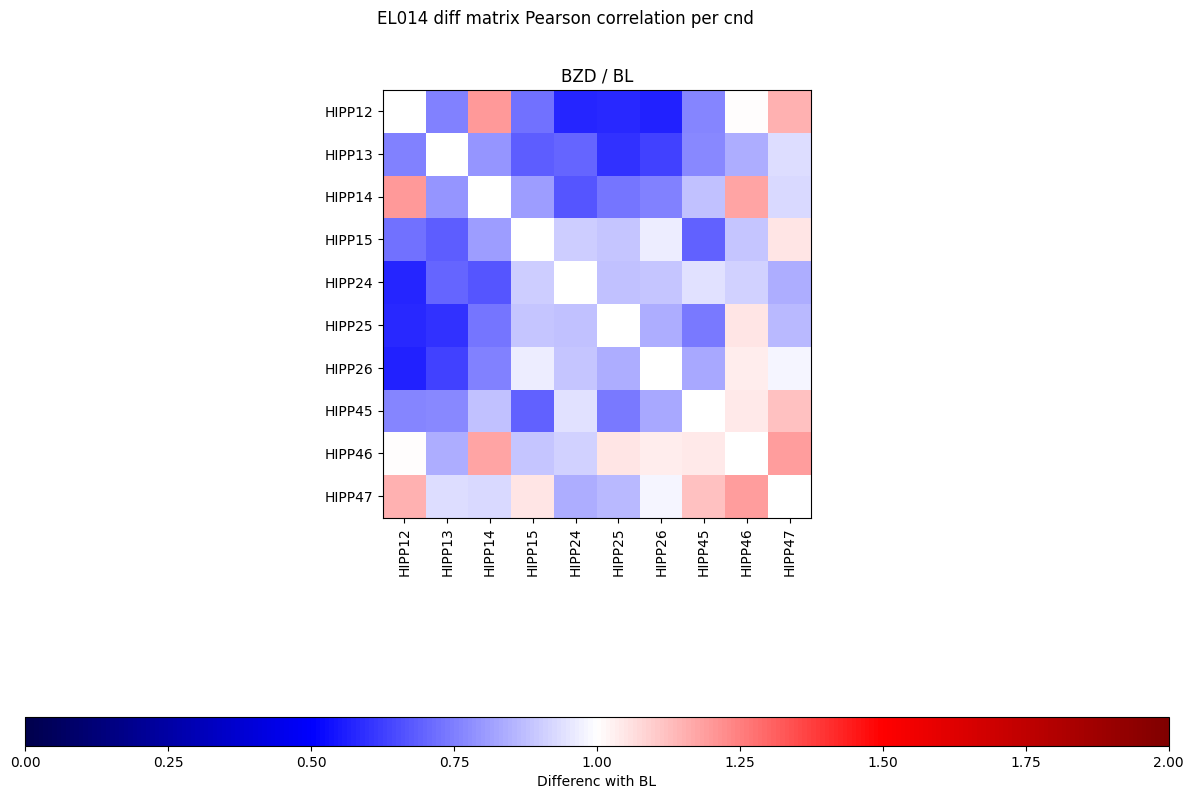

In [22]:
# Get mean corr matrix baseline
list_matrix_BL = np.array(All_LFP_df['Normalized Correlation matrix'][(All_LFP_df['Condition'] == 'BL')].tolist())
Mean_corr_matrix_BL = np.nanmean(list_matrix_BL, axis=0)

# Get mean corr matrix benzo
list_matrix_BZD = np.array(All_LFP_df['Normalized Correlation matrix'][(All_LFP_df['Condition'] == 'BZD')].tolist())
Mean_corr_matrix_BZD = np.nanmean(list_matrix_BZD, axis=0)

# Calculate the normalize matrix
Norm_matrix = Mean_corr_matrix_BZD/Mean_corr_matrix_BL

# Plot the normalized matrix
title_1 = patient + ' diff matrix Pearson correlation per cnd'
fig = plt.figure(title_1, figsize=(16, 8)).suptitle(title_1)
ax = plt.subplot2grid((12, 12), (0, 0), rowspan=8, colspan=12)
divnorm_diff = colors.TwoSlopeNorm(vmin=0, vcenter=1, vmax=2)
ax.set_title("BZD / BL")
im = ax.imshow(Norm_matrix, cmap='seismic', norm=divnorm_diff)
ax.set_xticks(np.arange(0, len(list_channel)))
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list_channel)
ax.set_yticks(np.arange(0, len(list_channel)))
ax.set_yticklabels(list_channel)

ax4 = plt.subplot2grid((12, 12), (11, 1), rowspan=1, colspan=10)
colorbar = colorbar.ColorbarBase(ax4, orientation='horizontal', cmap=cm.get_cmap('seismic'),norm=divnorm_diff, label='Differenc with BL')
plt.subplots_adjust(left=0.09, right=0.95, bottom=0.06, hspace=0.99)

In [23]:
# Load data across patients
xcorr_df = pd.read_pickle('Human_data/human_xcorr_df')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:525: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  legend_handles_unique = (pd.Series(legend_handles).loc[unique_idx]).tolist()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:559: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean().loc[current_control, yvar]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:561: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or 

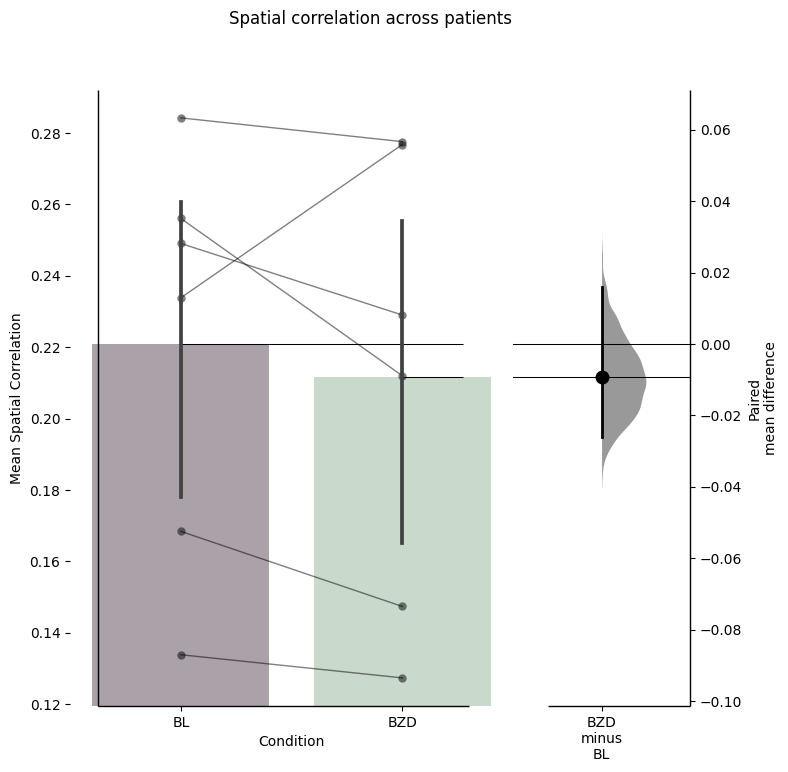

In [34]:
# Plot data across patients
title = 'Spatial correlation across patients'
fig = plt.figure(title, figsize=(8, 8)).suptitle(title)
gridspec.GridSpec(12, 12)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
Paired_booststrap = dabest.load(xcorr_df, idx=conditions,x="Condition", y='Mean Spatial Correlation',paired=True, id_col='Patient')
Paired_booststrap.mean_diff.plot(ax=ax1, slopegraph_kwargs={'marker':'o','mew':0},show_pairs=True,swarm_desat=1)
sns.barplot(ax=ax1, data=xcorr_df, x="Condition", y='Mean Spatial Correlation', alpha=0.5, order=conditions, palette=my_color_palette)
paired_result = Paired_booststrap.mean_diff.statistical_tests